# Exploratory Data Analysis for Kc_House_Data

This is a tutorial notebook on how to perform EDA for a dataset.

The chosen data for this tutorial is House Sales in King County, USA, available on [Kaggle](https://www.kaggle.com/harlfoxem/housesalesprediction).

Check the blog post [How to perform EDA for machine learning?](https://mlwithhamza.blogspot.com/2021/07/how-to-perform-eda-for-machine-learning.html) for more informations about the used EDA method in this notebook.

In [150]:
# Importing basic libraries for EDA

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px
import plotly.graph_objects as go

# Importing the os library to get the path for the data file (not used in the EDA).
import os

# The following magic command lets matplotlib display images in the cells outputs.
%matplotlib inline

# Setting seaborn style
sb.set(style="darkgrid")

In [127]:
# Getting the list of entries in the current directory
#  The data file 'kc_house_data.csv' has to be in the same folder as this notebook
#  for it to appear in the following list

os.listdir('./')

['.ipynb_checkpoints',
 'areaplot.png',
 'barplot.png',
 'boxplot.png',
 'EDA',
 'EDA.html',
 'EDA.ipynb',
 'EDA.zip',
 'histplot.png',
 'kc_house_data.csv',
 'lineplot.png',
 'most common data charts.htm',
 'most common data charts_files',
 'Variable nature.png']

In [128]:
# Reading the data .csv file
data = pd.read_csv('kc_house_data.csv')

## Overall View

In [129]:
# List of the columns names
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [130]:
# Checking the head (top 5) rows of the dataframe and whowing all the columns
pd.set_option("display.max_columns", len(data.columns))
data.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0      5650     1.0           0     0          3      7        1180   
1      7242     2.0           0     0          3      7        2170   
2     10000     1.0           0     0          3      6         770   
3      5000     1.0           0     0          5      7        1050   
4      8080     1.0           0     0          3      8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1955             0    98178  47.5112 -122.257   
1            400      1951          1991    98125  47.7210 -122.319   
2              0      1933             0    98028  47.7379 -122.233   
3            910      1965             0    98136  47.5208 -122.393   
4              0      1987             0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503

In [131]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [132]:
# Helper function to print the values count of features
def feature_val_count(data, feature_name):
    s = data[feature_name].value_counts()
    return print(f"The Value counts of the feature {feature_name}: \n {s}")

In [133]:
# Checking the values count of the features to determine their nature
feature_val_count(data, 'condition')

The Value counts of the feature condition: 
 3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64


### Feature Naure:
From the type of the features and their values count, we can determine the nature of each feature:
- **Qualitative:**
  - **Nominal:** id, waterfront, zipcode
  - **Ordinal:** date, view, condition
- **Quantitative:**
  - **Discrete:** bedrooms, sqft_living, sqft_lot, sqft_above, sqft_basement, yr_built, yr_renovated, sqft_living15, sqft_lot15
  - **Continuous:** price, floors, lat, long,

In [134]:
# Checking the basic statistics for each feature(column) [Count, Mean, Standard Deviation, Minimum, Quartiles, and Maximum]
data.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21613.000000  21613.000000   21613.000000  21613.000000  21613.000000   
mean       7.656873   1788.390691     291.509045   1971.005136     84.402258   
std        1.175459    828.090978     442.575043     29.373411    401.679240   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000  21613.000000   21613.000000   21613.000000  
mean   98077.939805     47.560053   -122.213896    1986.552492   12768.455652  
std       53.505026      0.138564      0.140828     685.391304   27304.179631  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471000   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.230000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

## Univariate Analysis

In this step of the EDA, each variable is examined and assessed by itself. Usually this step dosen't provide valuable insight, however it helps understanding each feature better by visualizing its distribution and examining it's statistics.

In [135]:
data.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0      5650     1.0           0     0          3      7        1180   
1      7242     2.0           0     0          3      7        2170   
2     10000     1.0           0     0          3      6         770   
3      5000     1.0           0     0          5      7        1050   
4      8080     1.0           0     0          3      8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1955             0    98178  47.5112 -122.257   
1            400      1951          1991    98125  47.7210 -122.319   
2              0      1933             0    98028  47.7379 -122.233   
3            910      1965             0    98136  47.5208 -122.393   
4              0      1987             0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503

Usually the 'id' variable is ignored because it has no meaning and it is only used to index each row with a unique identifier.

#### Date

In [136]:
type(data.date[0])

str

**Remark:**
Notice is that the date type is 'str', so we need to convert it to a timestamp variable, which is achieved using the pandas method .to_date_time()

In [137]:
data.date = pd.to_datetime(data.date, infer_datetime_format=True)

In [138]:
data.head()

id       date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13  221900.0         3       1.00         1180   
1  6414100192 2014-12-09  538000.0         3       2.25         2570   
2  5631500400 2015-02-25  180000.0         2       1.00          770   
3  2487200875 2014-12-09  604000.0         4       3.00         1960   
4  1954400510 2015-02-18  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0      5650     1.0           0     0          3      7        1180   
1      7242     2.0           0     0          3      7        2170   
2     10000     1.0           0     0          3      6         770   
3      5000     1.0           0     0          5      7        1050   
4      8080     1.0           0     0          3      8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1955             0    98178  47.5112 -122.257   
1            400      1951          1991    98125  47.7210 -122.319   
2              0      1933             0    98028  47.7379 -122.233   
3            910      1965             0    98136  47.5208 -122.393   
4              0      1987             0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503

In [139]:
# Checking that the date type changed correctly
type(data.date[0])

pandas._libs.tslibs.timestamps.Timestamp

In [140]:
# Creating a list of the years, and months extracted form the date feature.
Years = list(pd.DatetimeIndex(data.date).year)
Months = list(pd.DatetimeIndex(data.date).month)

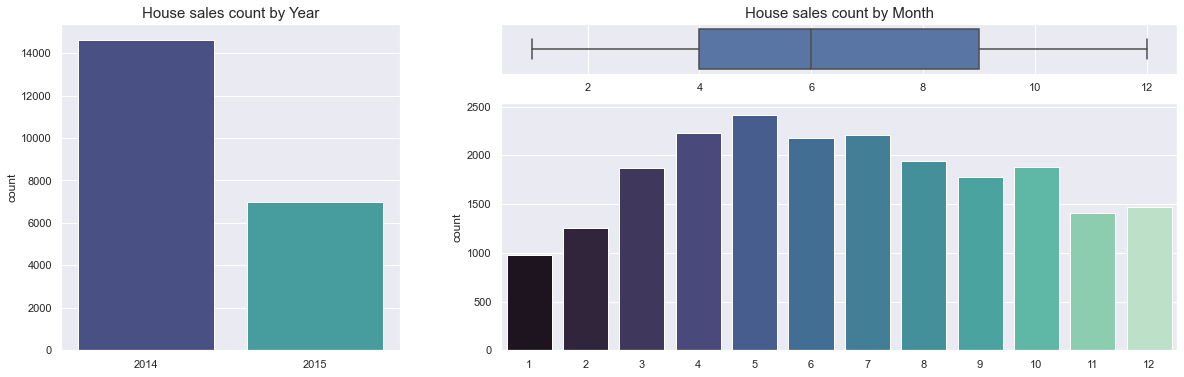

In [141]:
# Creating baplot for the sales bount by Year and by Month
# Creating a boxplot for the monthly sales count distribution

fig = plt.figure(figsize=(20,6))
grid = plt.GridSpec(2, 2, width_ratios=(1, 2), height_ratios=(1,5), hspace=0.2, wspace=0.2)
Left_ax = fig.add_subplot(grid[:, 0])
Right_top = fig.add_subplot(grid[0, 1])
Right_bot = fig.add_subplot(grid[1, 1], xticklabels=['Jan','Feb','Mar','May','Avr','Jun','Jul','Aou','Sep','Oct','Nov','Dec'])

sb.countplot(x=Years, palette='mako', ax=Left_ax)
Left_ax.set_title('House sales count by Year', fontdict={'fontsize':15})
sb.countplot(x=Months, palette='mako', ax=Right_bot)
sb.boxplot(x=Months, ax=Right_top)
Right_top.set_title('House sales count by Month', fontdict={'fontsize':15});

#### Price

In [142]:
# Sorting the data by date and extracting some basics statistics aout the price feature
# Calculating the Upper and Lower whiskers of the boxplot

data_sorted = data.sort_values(by='date')

median = np.median(data.price)
upper_quartile = np.percentile(data.price, 75)
lower_quartile = np.percentile(data.price, 25)

iqr = upper_quartile - lower_quartile
upper_whisker = data.price[data.price<=upper_quartile+1.5*iqr].max()
lower_whisker = data.price[data.price>=lower_quartile-1.5*iqr].min()

In [143]:
print('\033[1m' + 'Price feature statistics:\n')

display(data_sorted.price.describe())
print('')
print(f'Upper Whisker: {upper_whisker}')
print(f'Lower Whisker: {lower_whisker}')

Price feature statistics:



count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64


Upper Whisker: 1127500.0
Lower Whisker: 75000.0


In [144]:
n_outliers = (data_sorted.price>upper_whisker).sum()
per_outlizers = n_outliers/len(data_sorted.price)*100
print(f'Number of outliers: {n_outliers}')
print(f'Percentage of outliers: {per_outlizers:.2f}%')

Number of outliers: 1146
Percentage of outliers: 5.30%


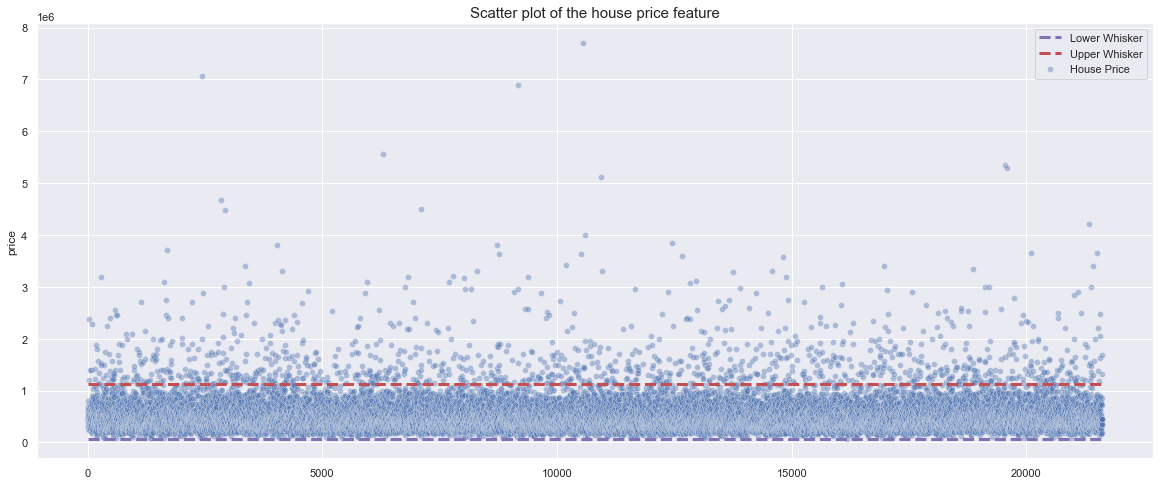

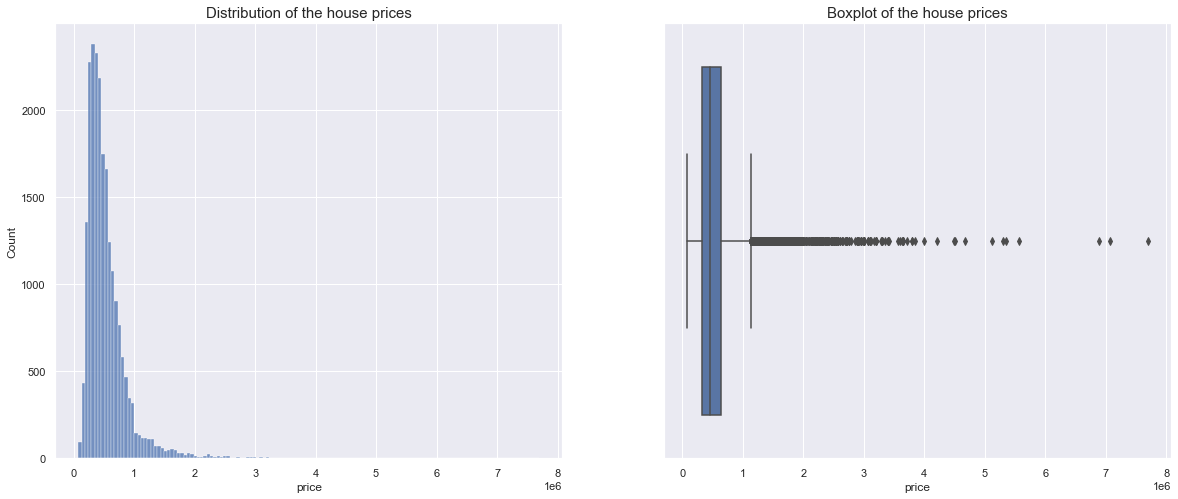

In [145]:
# Plotting the price feature using 3 different types of plots to better visualize the distribution

plt.figure(figsize=(20,8))
sb.scatterplot(x=range(len(data_sorted.price)) ,y=data_sorted.price, alpha=0.4)
plt.plot((0, len(data.price)), (lower_whisker, lower_whisker), 'm--',linewidth=3)
plt.plot((0, len(data.price)), (upper_whisker, upper_whisker), 'r--',linewidth=3)
plt.legend(['Lower Whisker', 'Upper Whisker', 'House Price'])
plt.title('Scatter plot of the house price feature', fontdict={'fontsize':15})

plt.figure(figsize=(20,8))
plt.subplot(121)
sb.histplot(data=data.price, bins=140)
plt.title('Distribution of the house prices', fontdict={'fontsize':15})

plt.subplot(122)
sb.boxplot(x=data.price)
plt.title('Boxplot of the house prices', fontdict={'fontsize':15});

**Remark:** 
Notice that the distribution of prices is extremeply right skewed, and that we have 1146 outlires out of 21613 entries.
Almost 94.7% of the house prices are below 1127500.

#### Bedrooms & Bathrooms

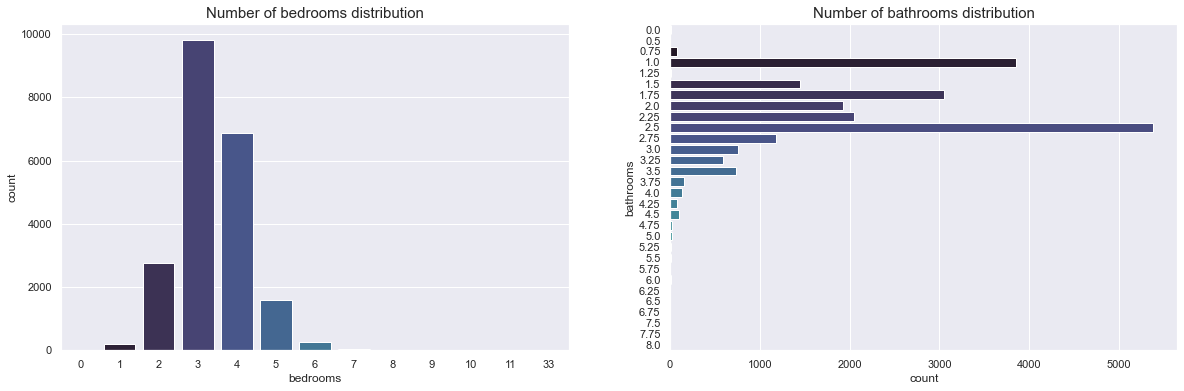

In [146]:
plt.figure(figsize=(20,6))
plt.subplot(121)
sb.countplot(x=data.bedrooms, palette='mako' )
plt.title('Number of bedrooms distribution', fontdict={'fontsize':15})
plt.subplot(122)
sb.countplot(y=data.bathrooms, palette='mako' )
plt.title('Number of bathrooms distribution', fontdict={'fontsize':15});

As shown in the image above, there are homes with three-quarters and half of a bathroom, and this means:
A 1.5 bath would mean one full bathroom, and one half bathroom. A 0.5 bathroom is called a half bath. It doesn't mean half bath in terms of its size in square feet. A half bath offers a sink and a toilet but no shower or bathtub. This type of math notations for bathrooms are commonly used in USA and that's why it appears in this dataset.

#### Sqft_living, sqft_lot, sqft_living15, sqft_lot15, sqft_above, and sqft_basement.

sqft_living15 & sqft_lot15: Living room area and lot area in 2015, implying that there was some renovations.

In [147]:
sqft_des = pd.DataFrame(data=[data.sqft_living.describe(),data.sqft_lot.describe()])

In [148]:
pd.DataFrame((data.sqft_basement>0).value_counts()).transpose()

False  True 
sqft_basement  13126   8487

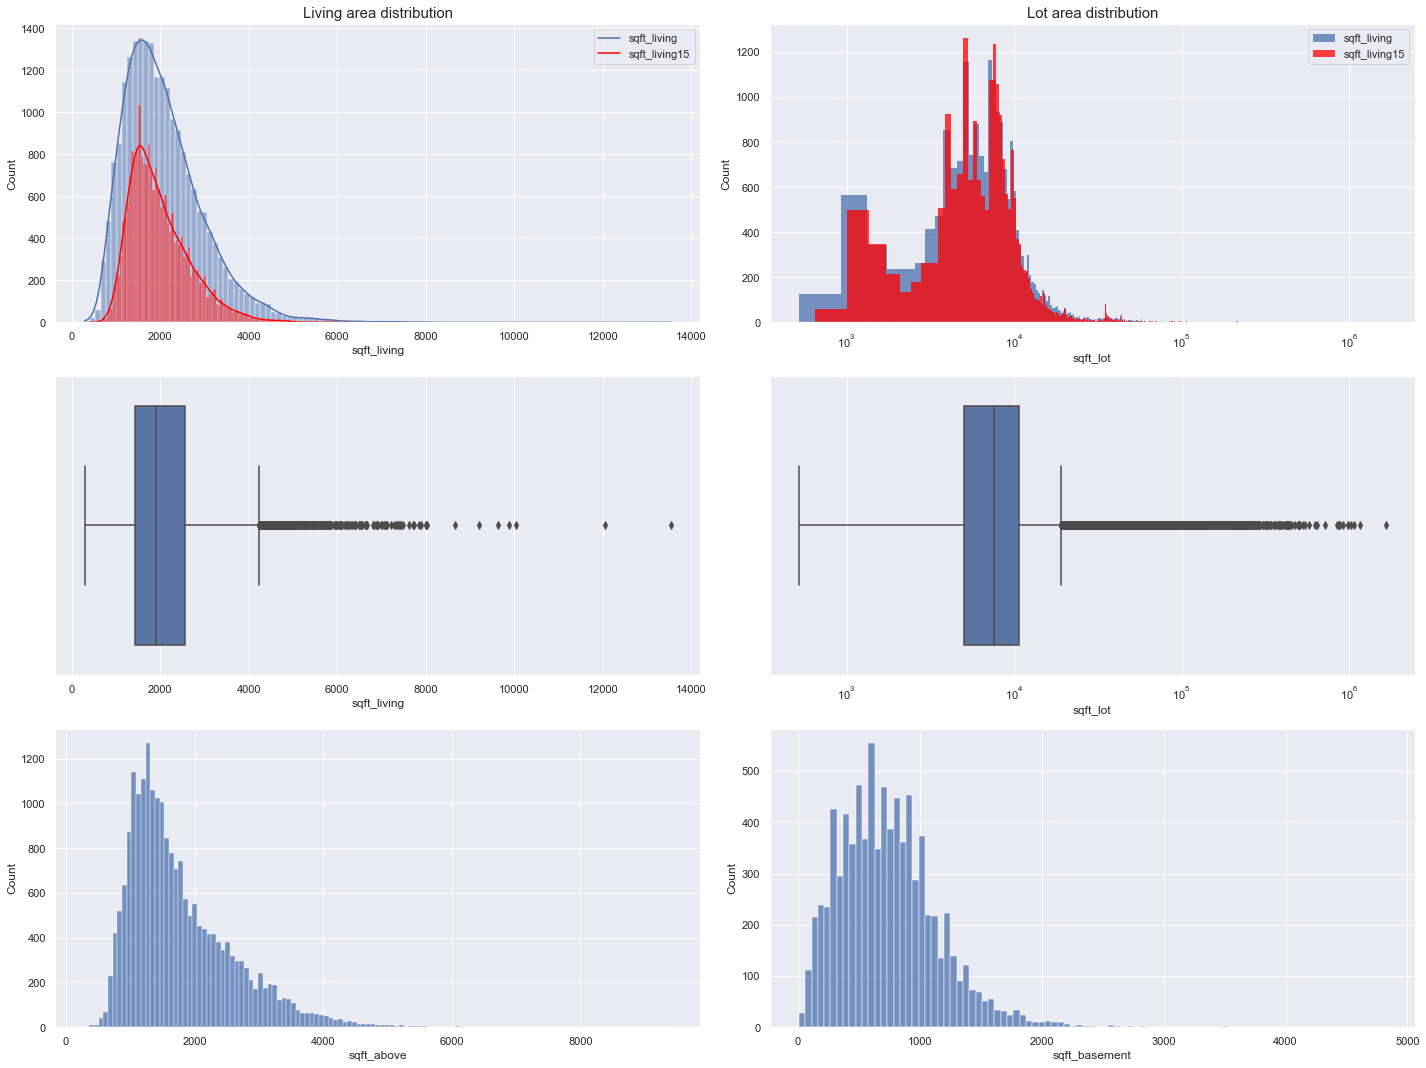

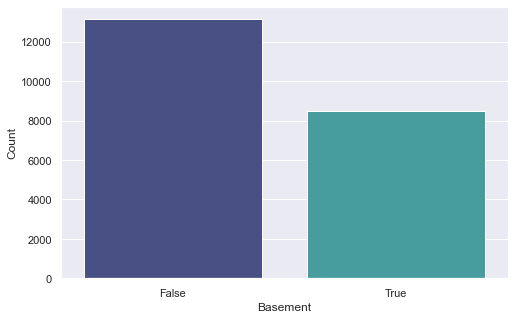

In [154]:
plt.figure(figsize=(20,15))
plt.subplot(321)
sb.histplot(x=data.sqft_living, kde=True, bins= 110)
sb.histplot(x=data.sqft_living15, kde=True, bins= 110, color='red')
plt.legend(['sqft_living','sqft_living15'])
plt.title('Living area distribution', fontdict={'fontsize':15})
plt.subplot(322)
ax = sb.histplot(x=data.sqft_lot)
ax = sb.histplot(x=data.sqft_lot15, color='red')
plt.legend(['sqft_living','sqft_living15'])
plt.title('Lot area distribution', fontdict={'fontsize':15})
ax.set_xscale('log')
plt.subplot(323)
sb.boxplot(x=data.sqft_living)
plt.subplot(324)
ax2 = sb.boxplot(x=data.sqft_lot)
ax2.set_xscale('log')
plt.subplot(325)
sb.histplot(x=data.sqft_above)
plt.subplot(326)
ax3 = sb.histplot(x=data[data.sqft_basement>0]['sqft_basement'])
#ax3.set_xscale('log')
plt.tight_layout()

basement_bool = pd.DataFrame((data.sqft_basement>0).value_counts()).reset_index()
plt.figure(figsize=(8,5))
ax = sb.barplot(y=basement_bool['sqft_basement'], x=basement_bool['index'], palette='mako')
ax.set(ylabel='Count', xlabel='Basement');

#### floors, waterfront, view, condition, and grade

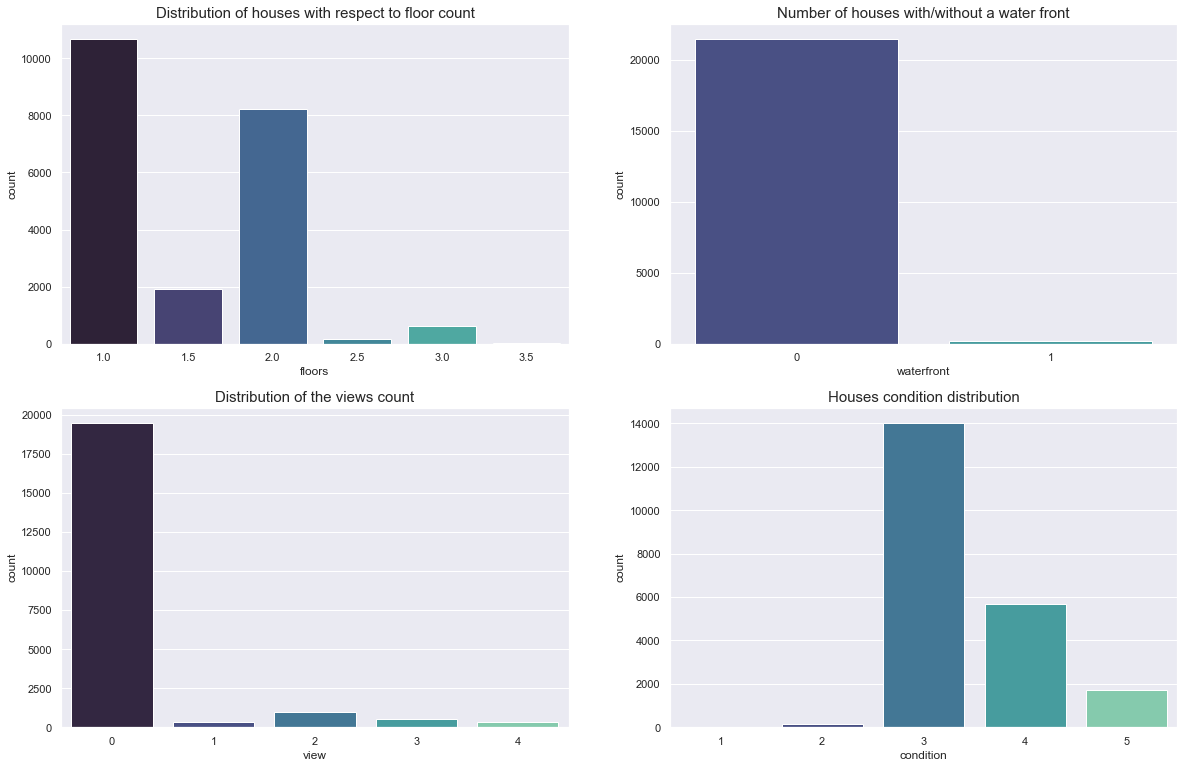

In [155]:
plt.figure(figsize=(20,20))
plt.subplot(321)
sb.countplot(x=data.floors, palette='mako')
plt.title('Distribution of houses with respect to floor count', fontdict={'fontsize':15})
plt.subplot(322)
sb.countplot(x=data.waterfront, palette='mako')
plt.title('Number of houses with/without a water front', fontdict={'fontsize':15})
plt.subplot(323)
sb.countplot(x=data.view, palette='mako')
plt.title('Distribution of the views count', fontdict={'fontsize':15})
plt.subplot(324)
sb.countplot(x=data.condition, palette='mako')
plt.title('Houses condition distribution', fontdict={'fontsize':15});

#### yr_built and yr_renovated

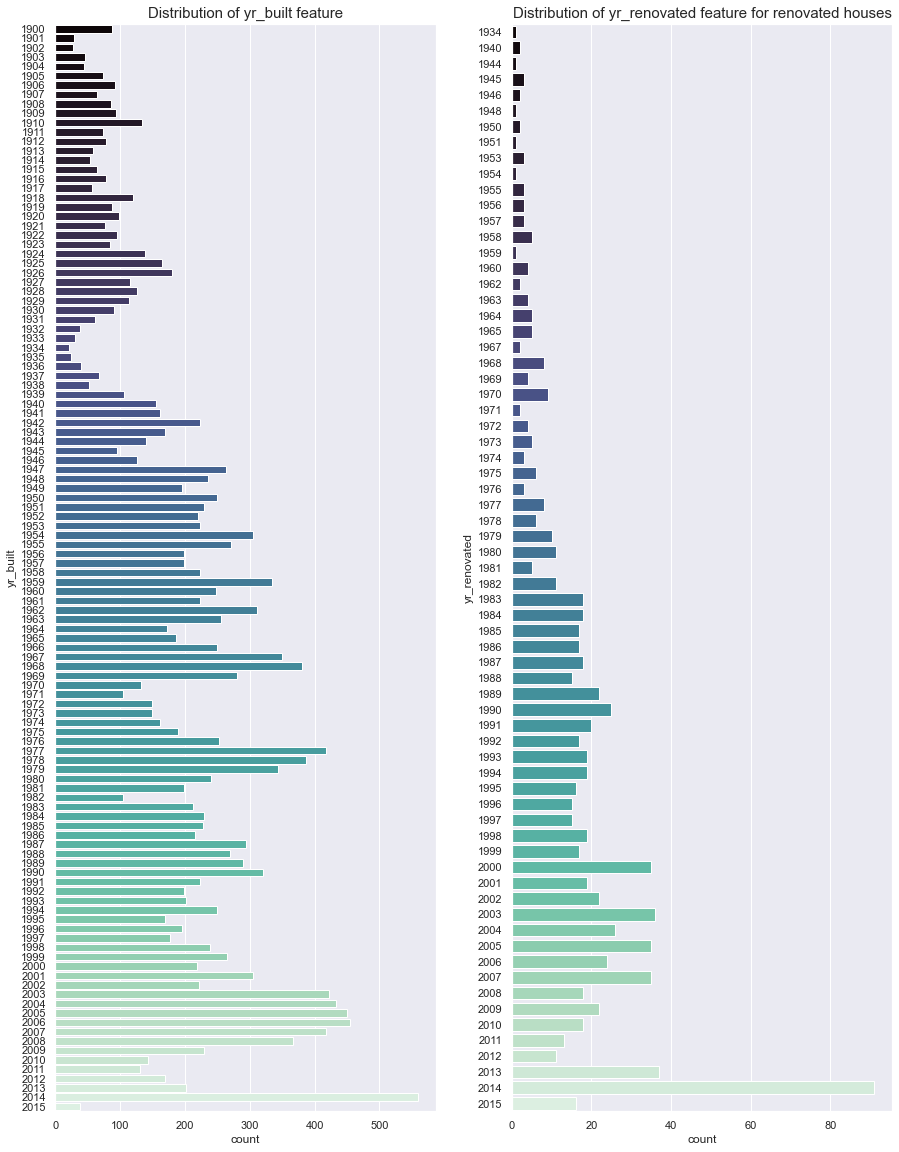

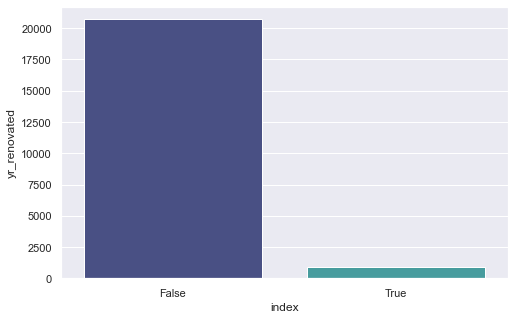

In [157]:
plt.figure(figsize=(15,20))
plt.subplot(121)
sb.countplot(y=data.yr_built, palette='mako')
plt.title('Distribution of yr_built feature', fontdict={'fontsize':15})
plt.subplot(122)
sb.countplot(y=data[data.yr_renovated>0]['yr_renovated'], palette='mako')
plt.title('Distribution of yr_renovated feature for renovated houses', fontdict={'fontsize':15})

plt.figure(figsize=(8,5))
yr_renov_bool = pd.DataFrame((data.yr_renovated>0).value_counts()).reset_index()
sb.barplot(y=yr_renov_bool['yr_renovated'], x=yr_renov_bool['index'], palette='mako')
ax.set(ylabel='Count', xlabel='Renovated');

#### Lon, and Lat

The best practice in dealing with longitude & Latitude variables is to plot them on a map to visualize the distribution (scatter) of positions on a real scale. And this is valid for both univariate and multivariate analysis. 

In [158]:
df = data[['long','lat']].copy()
df['loc']='USA'
df.rename(columns={'long':'lon'}, inplace=True)

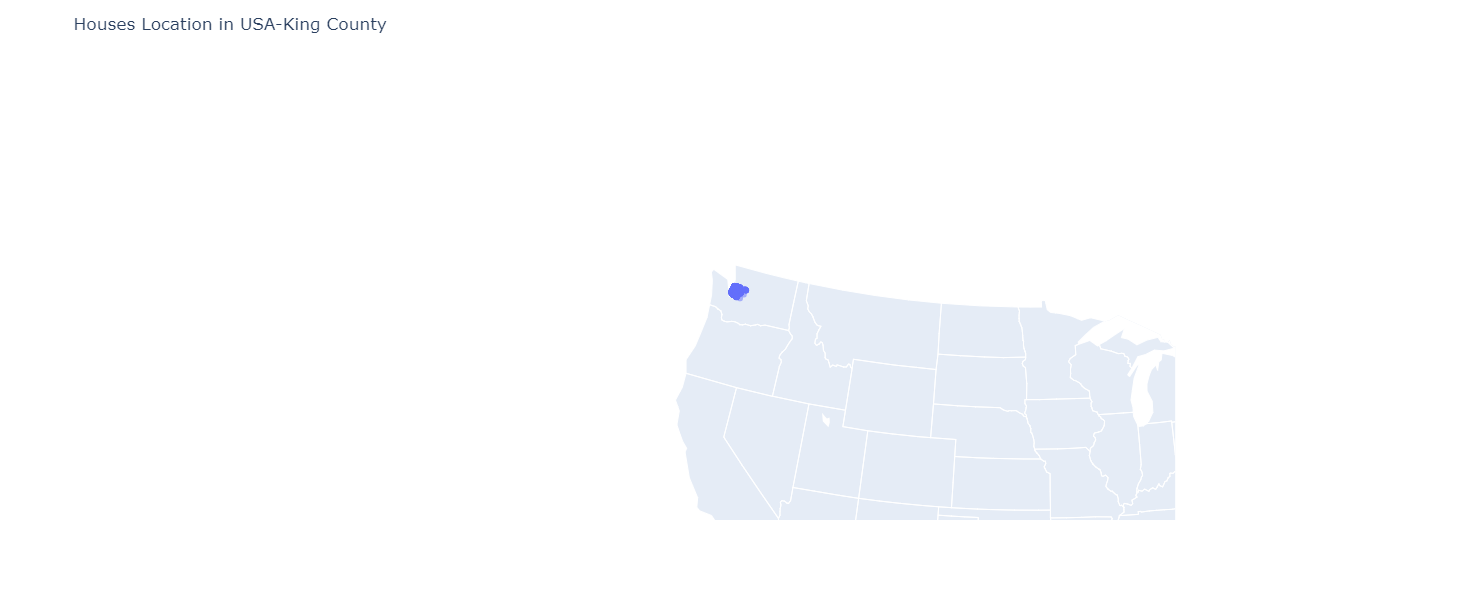

In [159]:
fig = go.Figure(data=px.scatter_geo(
        lon = df['lon'],
        lat = df['lat'],
        center={'lat':df['lat'].mean(), 'lon':df['lon'].mean()},
        width=800,
        height=600,
        opacity=0.5
        ))

fig.update_layout(
        title = 'Houses Location in USA-King County',
        geo_scope='usa'
    )
fig.show()

### Conclusion of univariate analysis

Many of the categorical features on the dataset are heavely unbalanced like 'condition', 'view', 'waterfront', and 'floors', which may be the cause of the extreme skeweness of the distribution of hous prices and areas. These speculations can be further inspected by carrying out a multivariate analysis, which is the object of the following sections.

## Multivariate Analysis

Starting with bivariate analysis, and since we have a target variable which is the house prices, then we can limit the bivariate analysis to the 'price' vs All the other significant features. But first, let's take a quick look on the pair scatter plot of the numer

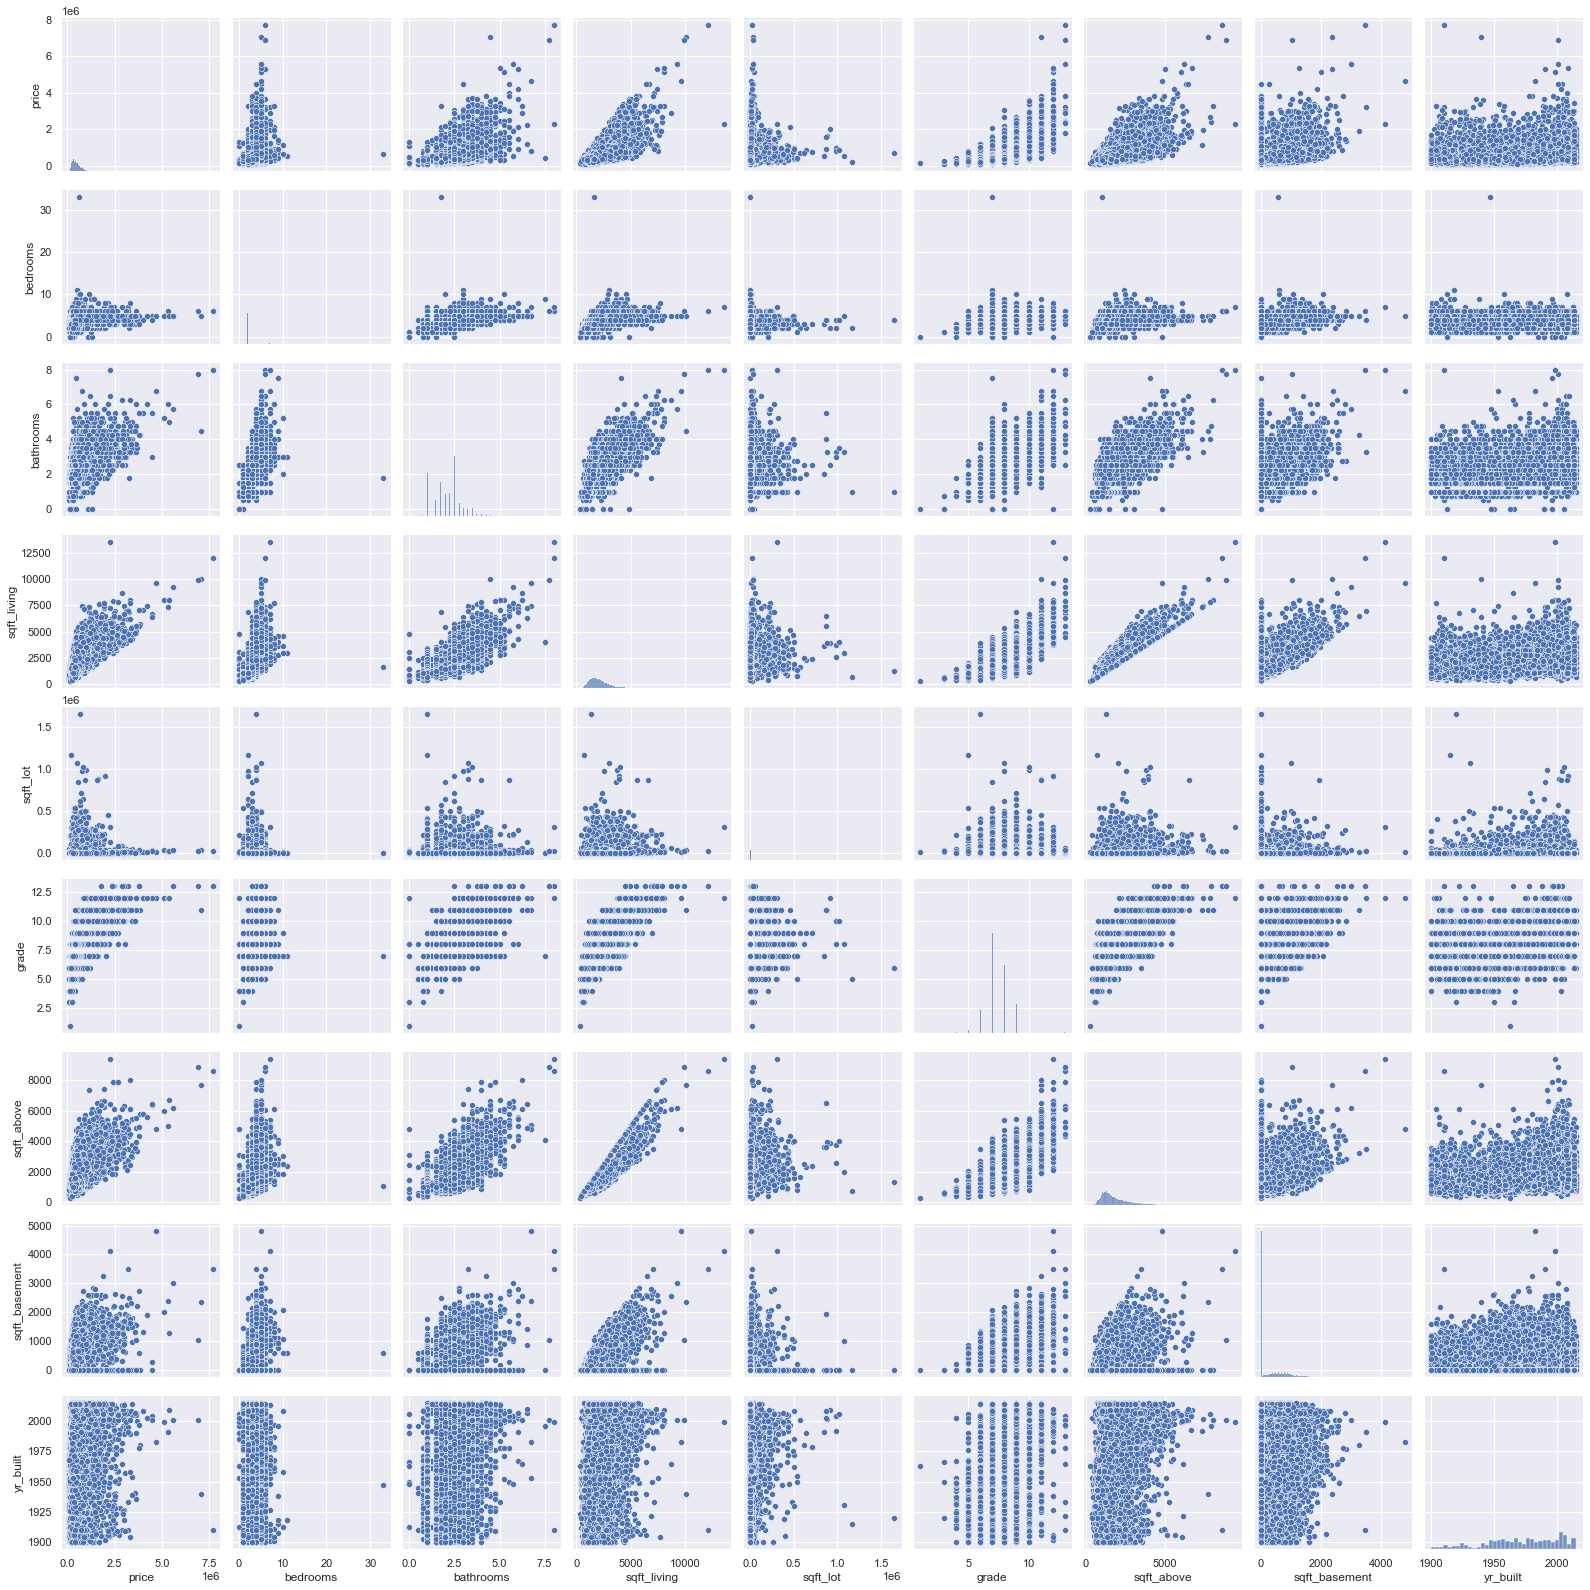

In [160]:
sb.pairplot(data=data[['price','bedrooms','bathrooms','sqft_living','sqft_lot','grade','sqft_above','sqft_basement','yr_built']], palette='mako');

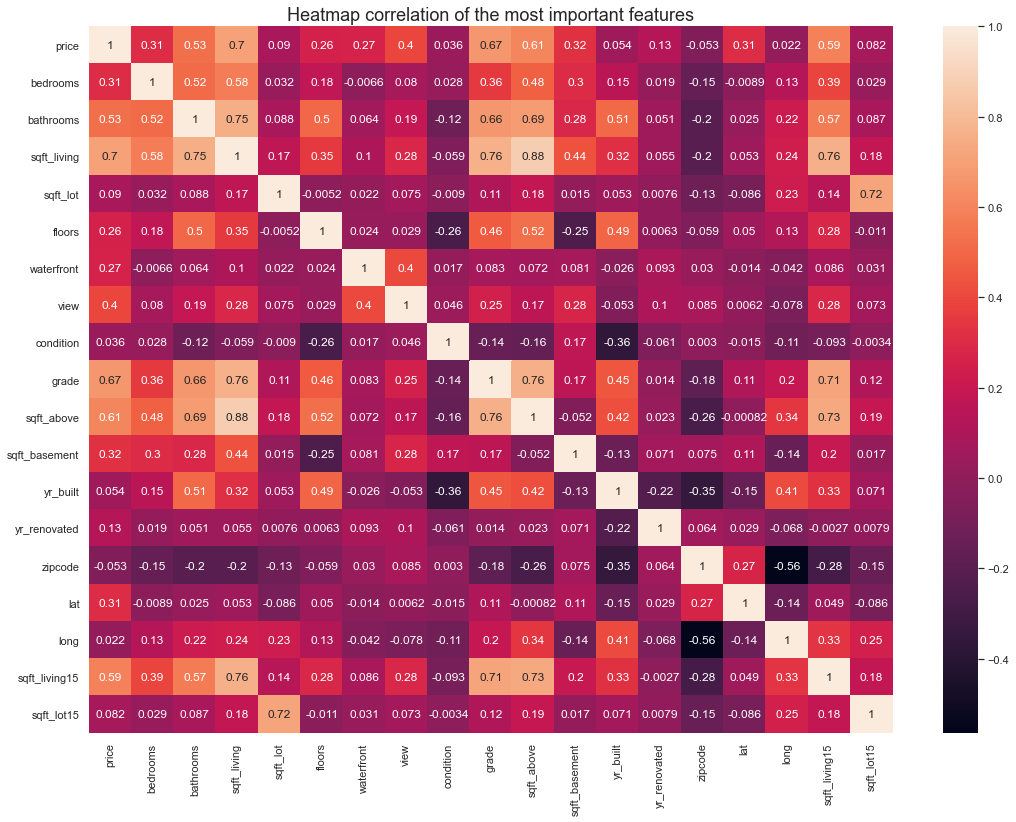

In [226]:
plt.figure(figsize=(18,13))
plt.title('Heatmap correlation of the most important features', fontsize=18)
sb.heatmap(data=data.iloc[:,1:].corr(), annot=True);

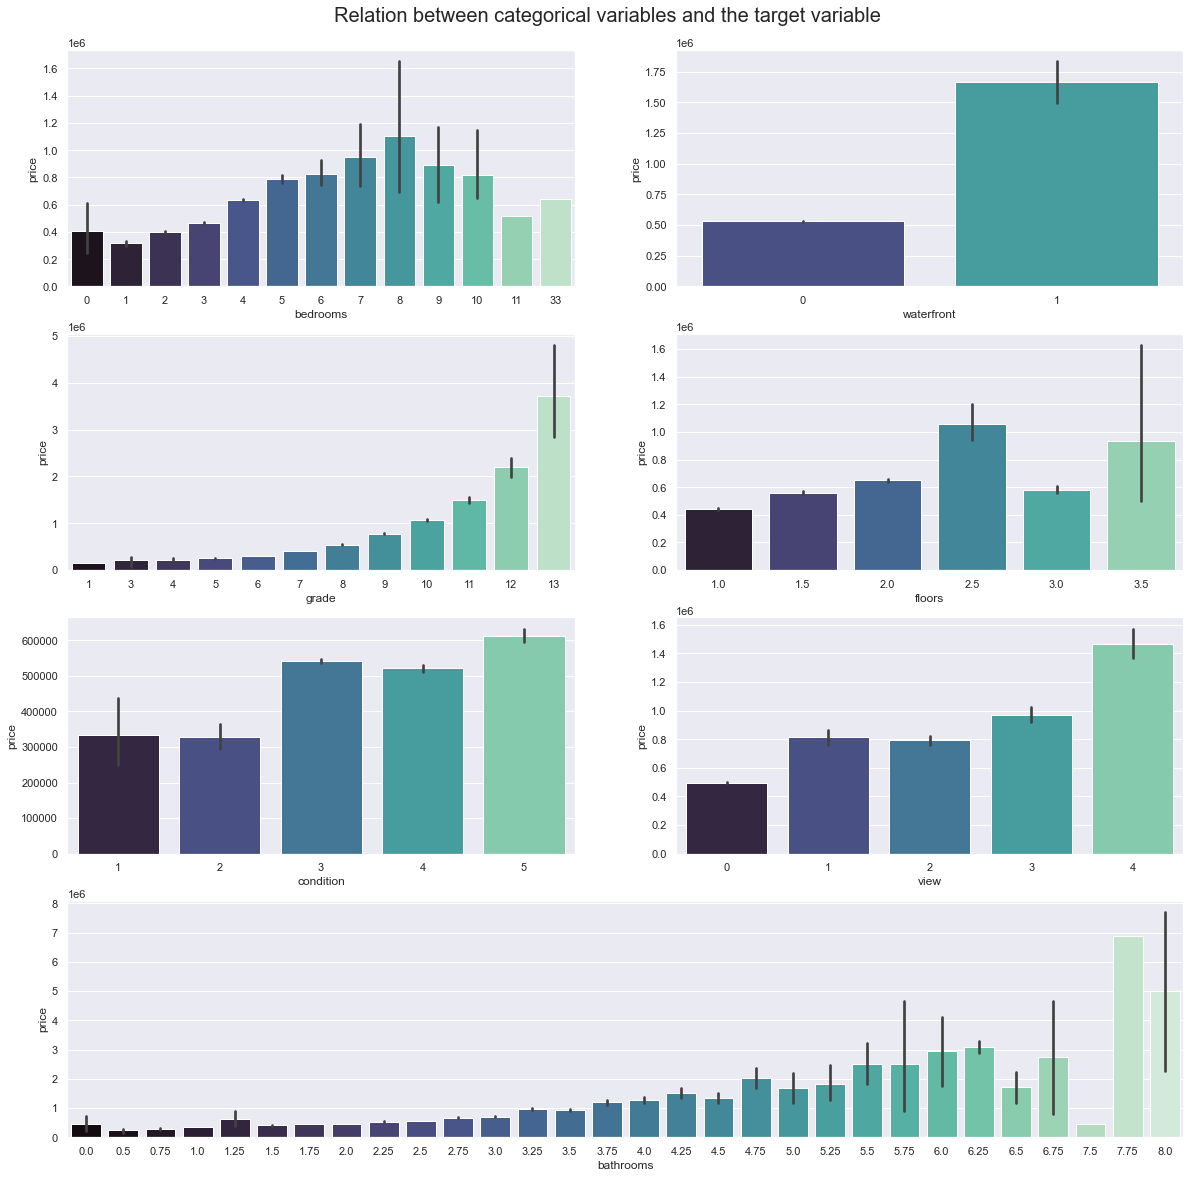

In [175]:
plt.figure(figsize=(20,20))
plt.suptitle('Relation between categorical variables and the target variable', y=0.91, fontsize=20)
plt.subplot(421)
sb.barplot(x=data.bedrooms, y=data.price, palette='mako')
plt.subplot(422)
sb.barplot(x=data.waterfront, y=data.price, palette='mako')
plt.subplot(423)
sb.barplot(x=data.grade, y=data.price, palette='mako')
plt.subplot(424)
sb.barplot(x=data.floors, y=data.price, palette='mako')
plt.subplot(425)
sb.barplot(x=data.condition, y=data.price, palette='mako')
plt.subplot(426)
sb.barplot(x=data.view, y=data.price, palette='mako')
plt.subplot(414)
sb.barplot(x=data.bathrooms, y=data.price, palette='mako')

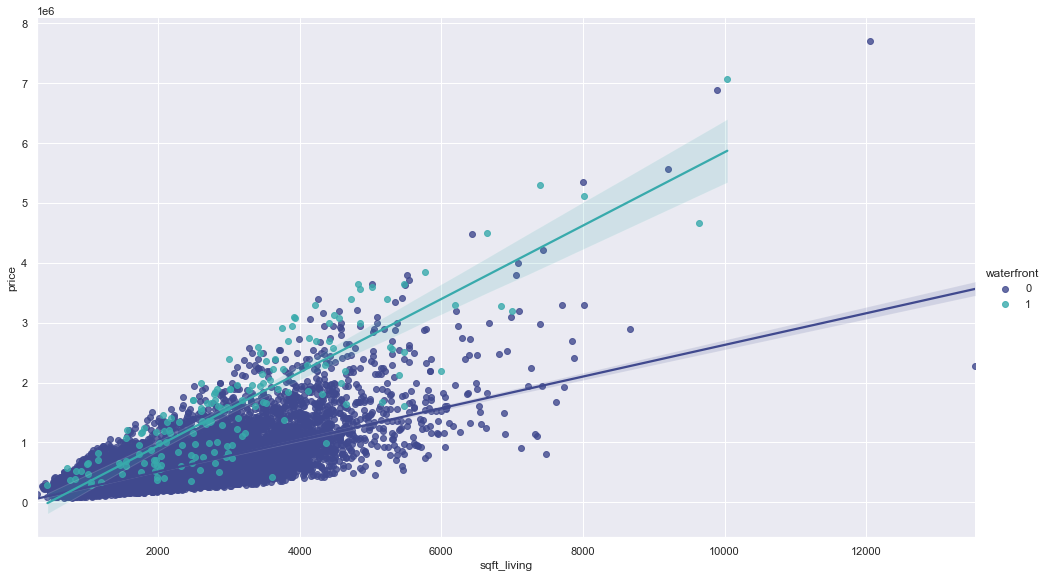

In [211]:
sb.lmplot(x='sqft_living', y='price', hue='waterfront', data=data, palette='mako', height=8, aspect=1.7);

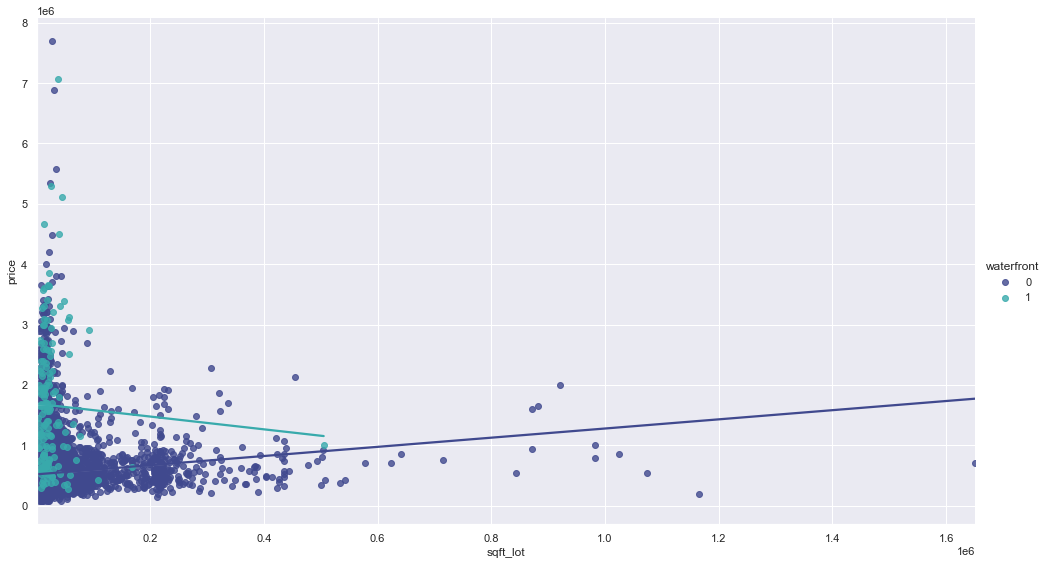

In [233]:
sb.lmplot(x='sqft_lot', y='price', hue='waterfront', data=data, palette='mako', height=8, aspect=1.7, ci=0);

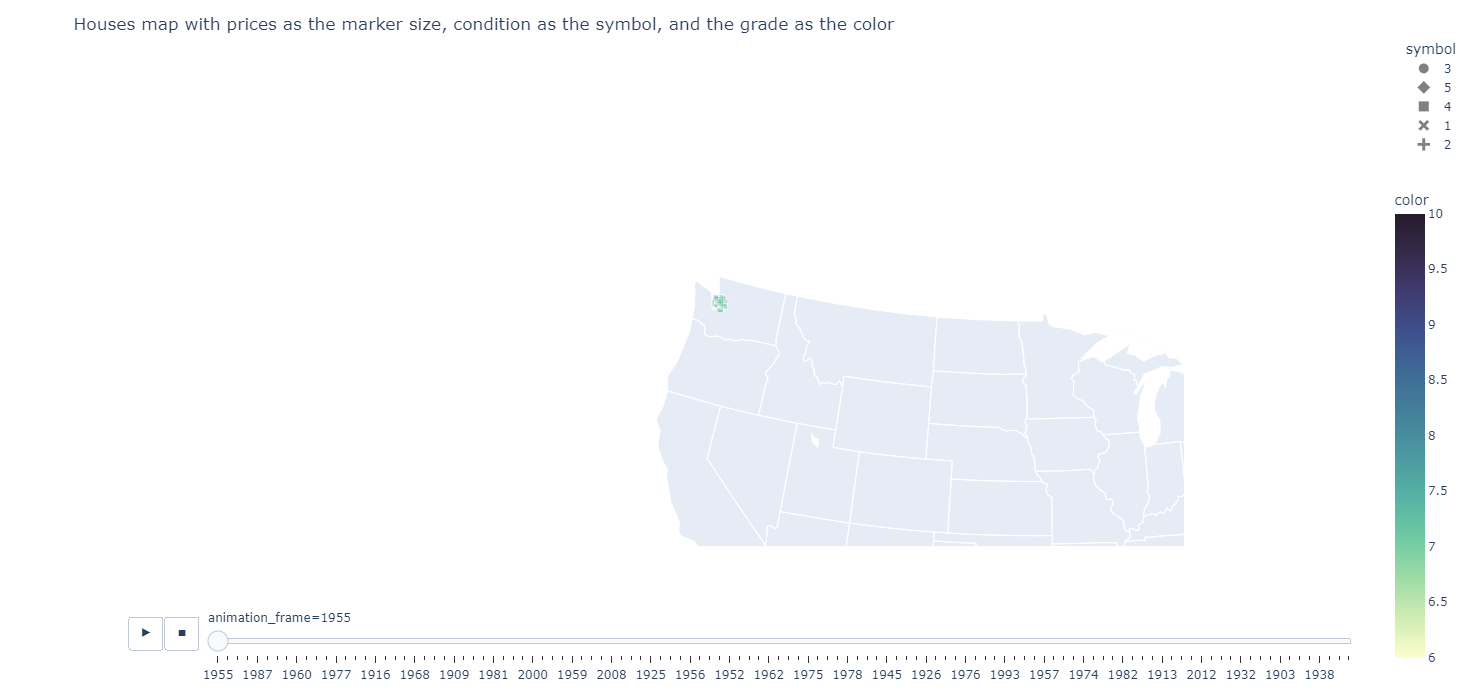

In [260]:
df = data[['long','lat','price','grade','condition','yr_built']].copy()
df.rename(columns={'long':'lon'}, inplace=True)

fig = go.Figure(data=px.scatter_geo(
        lon = df['lon'],
        lat = df['lat'],
        center={'lat':df['lat'].mean(), 
                'lon':df['lon'].mean()
               },
        size=df['price'],
        color=df['grade'],
        symbol=df['condition'],
        animation_frame=df['yr_built'],
        width=1000,
        height=700,
        opacity=0.5,
        color_continuous_scale="deep"
        ))

fig.update_layout(
        title = 'Houses map with prices as the marker size, condition as the symbol, and the grade as the color',
        geo_scope='usa'
    )
fig.layout.legend.y = 1.05
fig.layout.legend.x = 1.035
fig.layout.coloraxis.colorbar.y = 0.25
fig.show()

## Conclusion

In this notebook, I presented a simple and methodical way of performing an EDA for structured and clean data. In practice, data are collected in raw state and needs more cleaning work. The presented EDA was not aiming for a specific task even though we have concidered the price feature as a target variable for a classification task, but in case we're going to build a model there are more analysis to be made. For instance, we can further inspect the drop in price for the houses that have 6.5-7.5 bathrooms, and we can also think about binning some features and rechck whether or not a pattern has emmerged.